In [1]:
from PIL import Image
import numpy as np
import os

Image.MAX_IMAGE_PIXELS = 1600000000 # 40,000 squared

In [2]:
#download data
from downloadWaterData import downloadWaterData
d = downloadWaterData('Data', 'change')
longs = ['0N']
lats = ['60W']
d.downloadData(longs, lats)

0N 60W
Data/change_60W_0Nv1_3_2020.tif already exists - skipping


In [248]:
file_path = './Data/change_60W_0Nv1_3_2020.tif'

img = np.asarray(Image.open(file_path))[6000:6500,1000:1500]

<class 'numpy.ndarray'>
(500, 500)


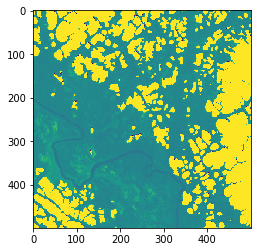

In [253]:
from matplotlib import pyplot as plt
print(type(img))
print(img.shape)
plt.imshow(img[:,:], interpolation='nearest')
plt.show()

In [255]:
n = 0
img3 = np.empty(img.shape)
for i in range(img.shape[0]):
    if n % 1000 == 0:
        print(n, '/ 10,000')
    n += 1
    for j in range(img.shape[1]):
        if img[i, j] > 200:
            img3[i, j] = 0
        else:
            img3[i, j] = 255


0 / 10,000


<class 'numpy.ndarray'>
(500, 500)


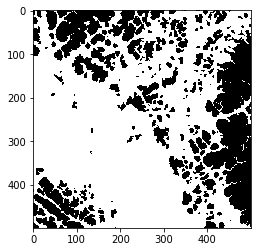

[[  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 ...
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [256]:
print(type(img3))
print(img3.shape)
plt.imshow(img3[:,:], interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()
print(img3)

In [257]:
class Sobel:
    def __init__(self):
        self.a = np.array([1, 2, 1])
        self.b = np.array([-1, 0, 1])
        
    def convolve(self, arr):
        print('Calc Vert')
        gx = np.empty(shape = arr.shape)
        print(gx.shape)
        for i in range(1, len(gx) - 1):
            if i % 10000 == 0:
                print(i)
            gx[i] = np.convolve(arr[i], self.b, 'same')
        gx = gx.T
        for j in range(1, len(gx) - 1):
            if j % 10000 == 0:
                print(j)
            gx[i] = np.convolve(gx[j], self.a, 'same')
        gx = gx.T
        return gx
    

In [258]:
s = Sobel()
Gx = s.convolve(img3)
Gy = s.convolve(img3.T).T

Calc Vert
(500, 500)
Calc Vert
(500, 500)


In [259]:
n = 0
G = np.empty(Gx.shape)
for i in range(Gx.shape[0]):
    if n % 1000 == 0:
        print(n, '/ 10,000')
    n += 1
    for j in range(img.shape[1]):
        if Gx[i, j] != 0:
            Gx[i, j] = 0
            G[i, j] = 0
        else:
            Gx[i, j] = 255
            G[i, j] = 255
        if Gy[i, j] != 0:
            Gy[i, j] = 0
            G[i, j] = 0
        else:
            Gy[i, j] = 255
            G[i, j] = 255


0 / 10,000


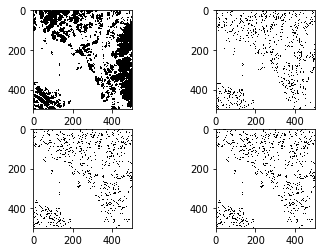

In [260]:
fig = plt.figure()
fig.add_subplot(2, 2, 1)
plt.imshow(img3[:,:], interpolation='nearest', cmap='gray', vmin=0, vmax=255)
fig.add_subplot(2, 2, 2)
plt.imshow(Gx, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
fig.add_subplot(2, 2, 3)
plt.imshow(Gy, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
fig.add_subplot(2, 2, 4)
plt.imshow(G, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()

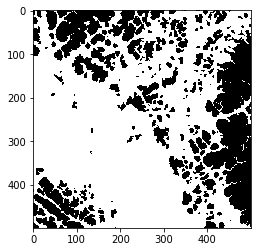

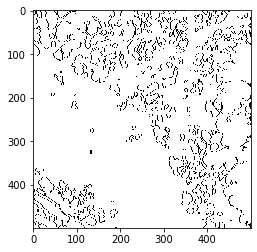

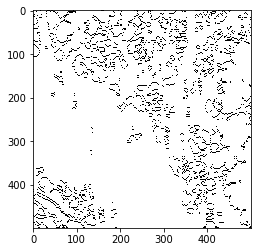

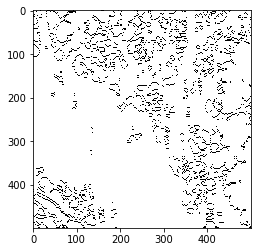

In [261]:
plt.imshow(img3[:,:], interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(Gx, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(Gy, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(G, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()

In [263]:
X = []
for i in range(len(G)):
    for j in range(len(G[0])):
        if img3[i, j] == 0:
            X.append([i, j])

In [264]:
len(X)

79353

In [300]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=9).fit(X)
clustering.labels_

array([ 0,  0,  0, ..., -1, 88, 88], dtype=int64)

In [301]:
len(set(clustering.labels_))

144

In [302]:
Y = np.zeros(G.shape)
n = 0
c = 255 // len(set(clustering.labels_))
for i in range(len(X)):
    Y[X[i][0], X[i][1]] = c * (1 + clustering.labels_[i])

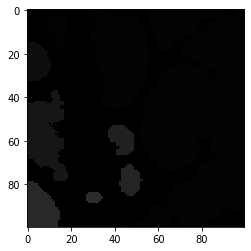

In [303]:
plt.imshow(Y[:100,:100], interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()